Encoder : 2 LSTM  
Decoder : 2 LSTM  
Epochs : 100 
Hidde layer : 1000  
Past : 40  
Future : 20  

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector,TimeDistributed, Dense, Input

2024-03-18 11:09:38.007326: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 11:09:38.010342: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 11:09:38.048208: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 11:09:38.955167: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


            Robberies
Month                
1966-01-01         41
1966-02-01         39
1966-03-01         50
1966-04-01         40
1966-05-01         43


<Axes: xlabel='Month'>

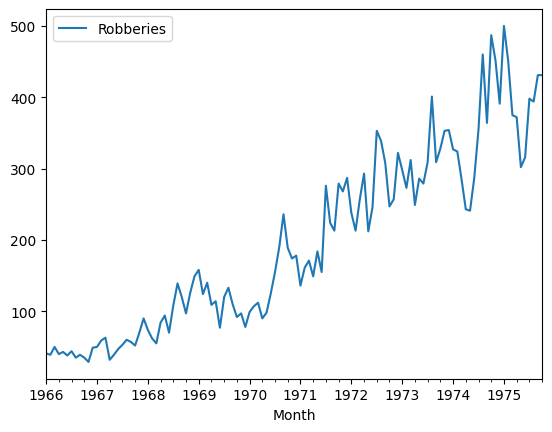

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
print(df.head())
df.plot()

In [3]:
max_value = max(df['Robberies'])
min_value = min(df['Robberies'])

def normalize_data(data):
    return (data - min_value) / (max_value - min_value)

def denormalize_data(data):
    return data * (max_value - min_value) + min_value

normalized_df = normalize_data(df['Robberies'])

n_features = 1
n_future = 20
n_past = 40

x = []
for i in range(len(normalized_df) - n_past - 1):
    window = normalized_df.iloc[i:i+n_past].to_numpy().reshape(-1, 1)
    x.append(window)
x = np.array(x)

y = []
for i in range(n_past, len(normalized_df)-n_future+1):
    window = normalized_df.iloc[i:i+n_future].to_numpy().reshape(-1, 1)
    y.append(window)
y = np.array(y)

train_size = 0.8
validation_size = 0.1
test_size = 0.1

indices = np.arange(min(len(x),len(y)))
np.random.shuffle(indices)
np.random.shuffle(indices)
np.random.shuffle(indices)
np.random.shuffle(indices)
train_index = int(train_size * len(indices))
val_index = int((train_size + validation_size) * len(indices))

train_indices = indices[:train_index]
val_indices = indices[train_index:val_index]
test_indices = indices[val_index:]

x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

print("Number of samples in training set:", len(x_train))
print("Number of samples in validation set:", len(x_val))
print("Number of samples in test set:", len(x_test))

print(x_train.shape[0],x_train.shape[1],x_train.shape[2])
print(x_test.shape[0],x_test.shape[1],x_test.shape[2])
print(x_val.shape[0],x_val.shape[1],x_val.shape[2])

print(y_train.shape[0],y_train.shape[1],y_train.shape[2])
print(y_test.shape[0],y_test.shape[1],y_test.shape[2])
print(y_val.shape[0],y_val.shape[1],y_val.shape[2])

Number of samples in training set: 47
Number of samples in validation set: 6
Number of samples in test set: 6
47 40 1
6 40 1
6 40 1
47 20 1
6 20 1
6 20 1


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 40, 2000)       │    16,016,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 2000)           │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 20, 2000)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 20, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 20, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 20, 1)          │         2,001 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,042,001 (427.41 MB)

 Trainable params: 112,042,001 (427.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - loss: 0.2805 - val_loss: 0.0780
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0829 - val_loss: 0.0885
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0956 - val_loss: 3.6376
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 3.2207 - val_loss: 0.7852
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.9262 - val_loss: 7.8915
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 5.4501 - val_loss: 0.2379
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.2509 - val_loss: 0.3764
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.3939 - val_loss: 0.4389
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.4561 - val_loss: 0.2488
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.2596 - val_loss: 0.3880
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.4085 - val_loss: 0.2205
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.2326 - val_loss: 0.1133
E

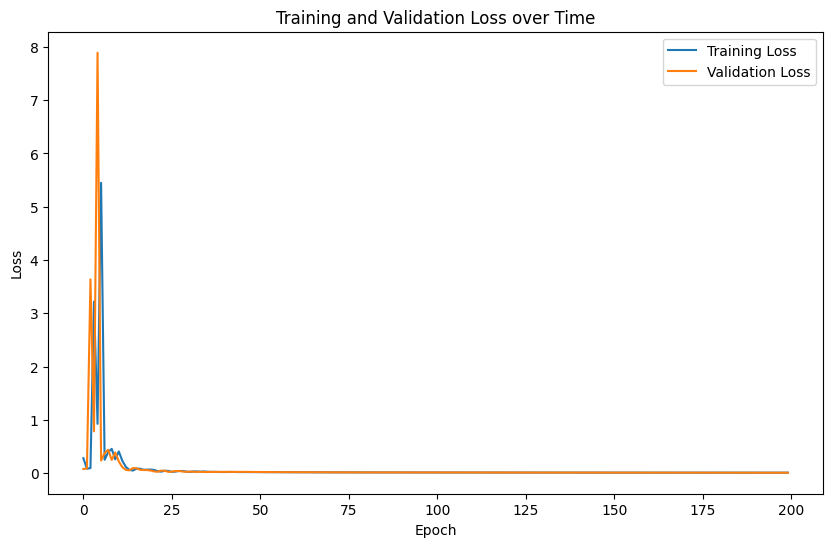

In [4]:
batch_size = x_train.shape[0]
epochs = 200
hidden_layer = 2000

model = Sequential()
model.add(LSTM(hidden_layer, input_shape=(n_past, n_features), return_sequences=True))
model.add(LSTM(hidden_layer))
model.add(RepeatVector(n_future))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Time')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


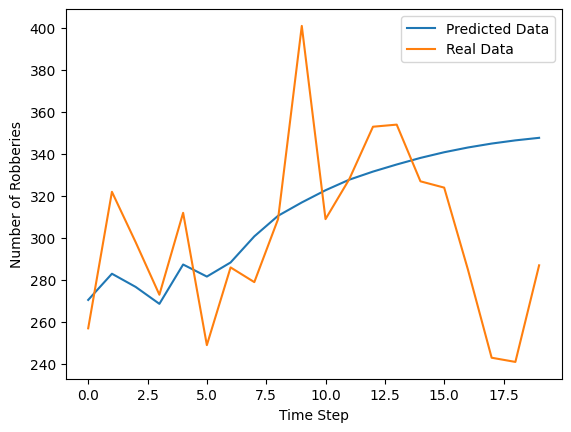

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


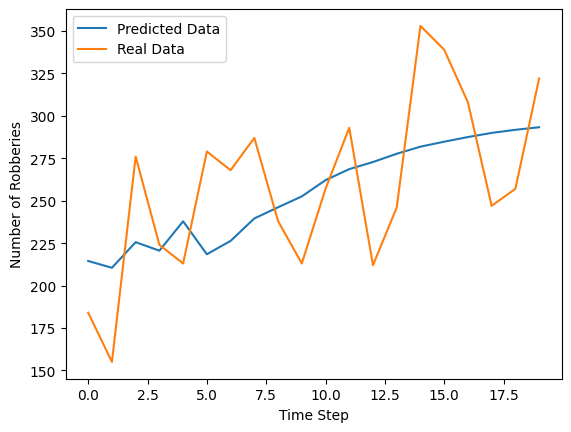

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


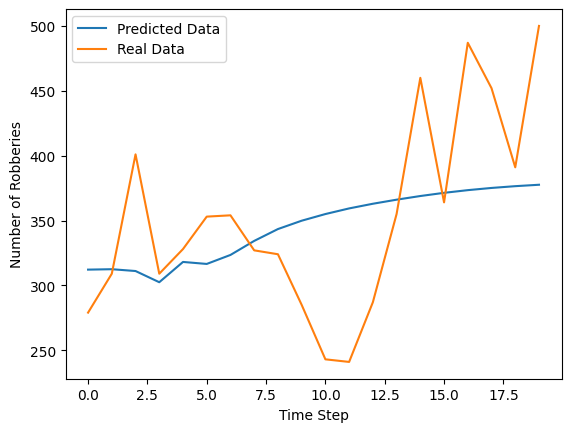

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


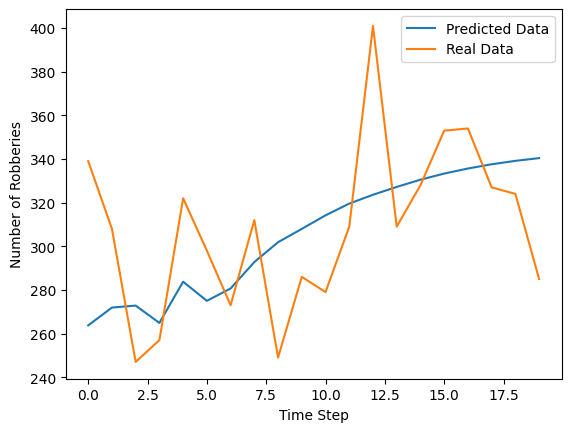

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


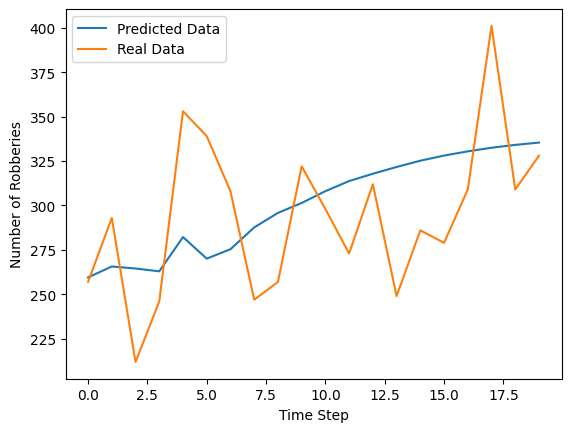

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


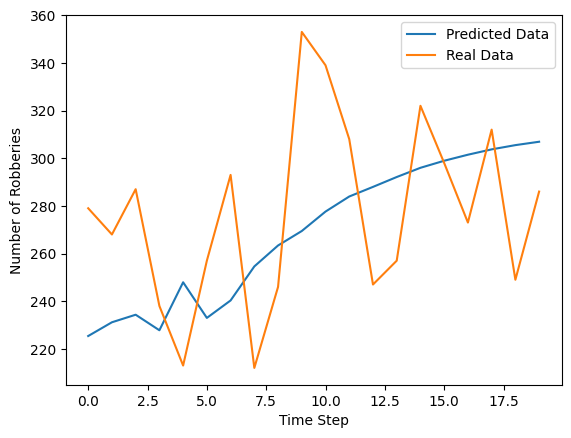

In [5]:
predictions = []
for i, x in enumerate(x_val):
    x = x.reshape(1,n_past,1)
    predicted = denormalize_data(model.predict(x)).flatten()
    predictions.append(predicted)
    real = denormalize_data(y_val[i].flatten())
    plt.plot(predicted, label='Predicted Data')
    plt.plot(real, label='Real Data')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Robberies')
    plt.legend()
    plt.show()

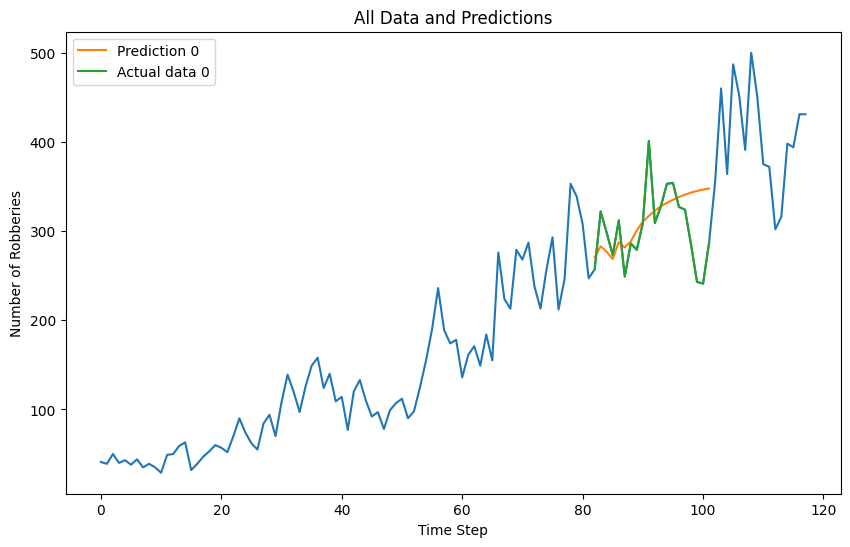

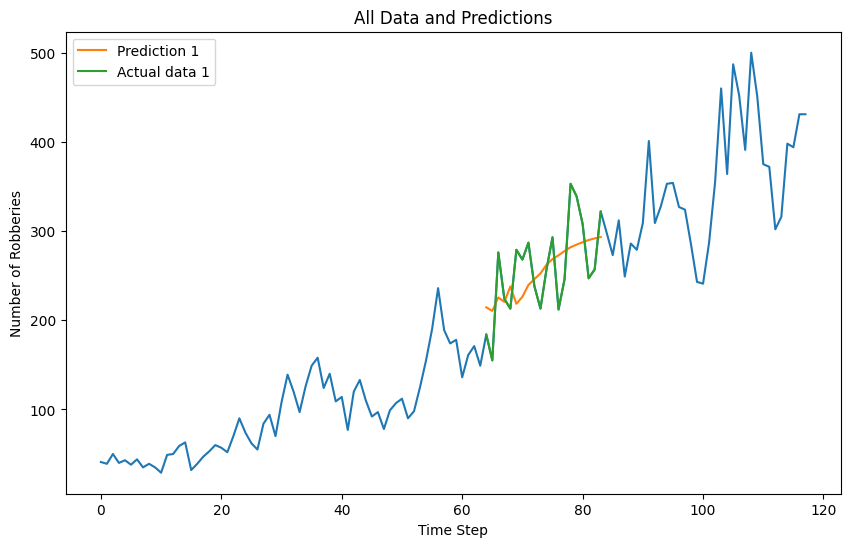

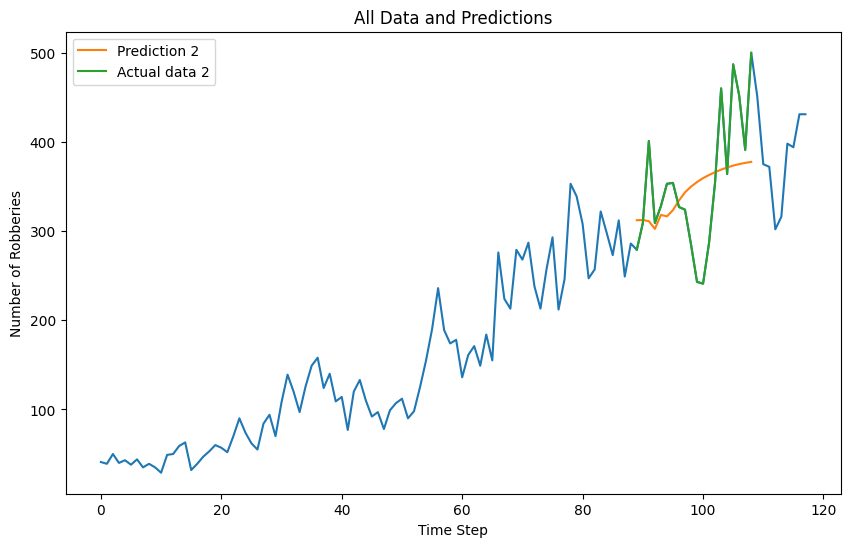

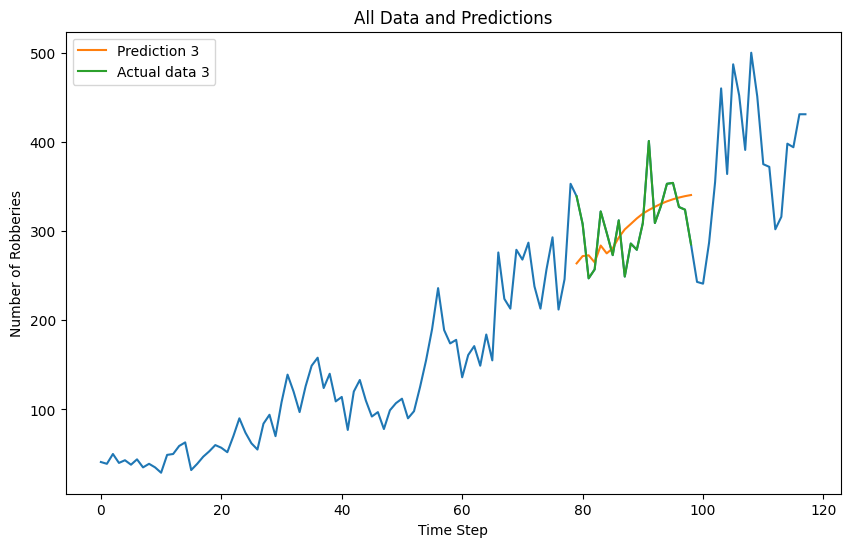

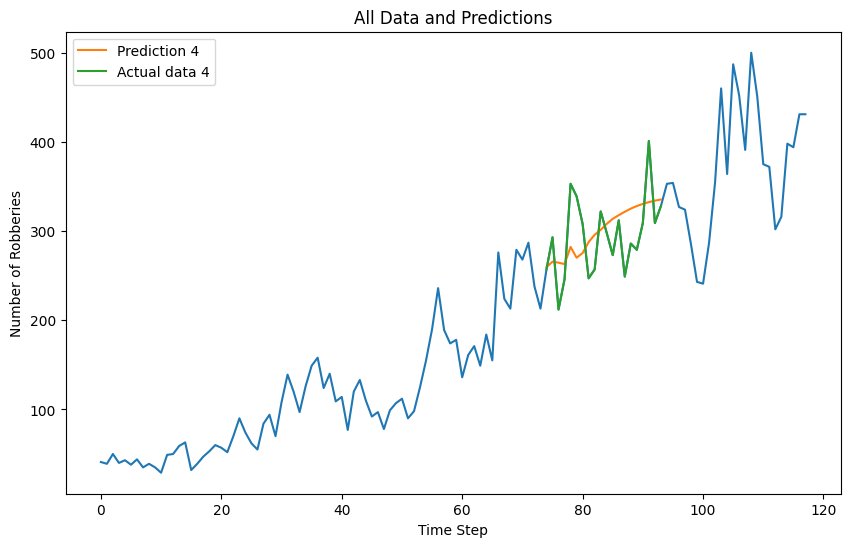

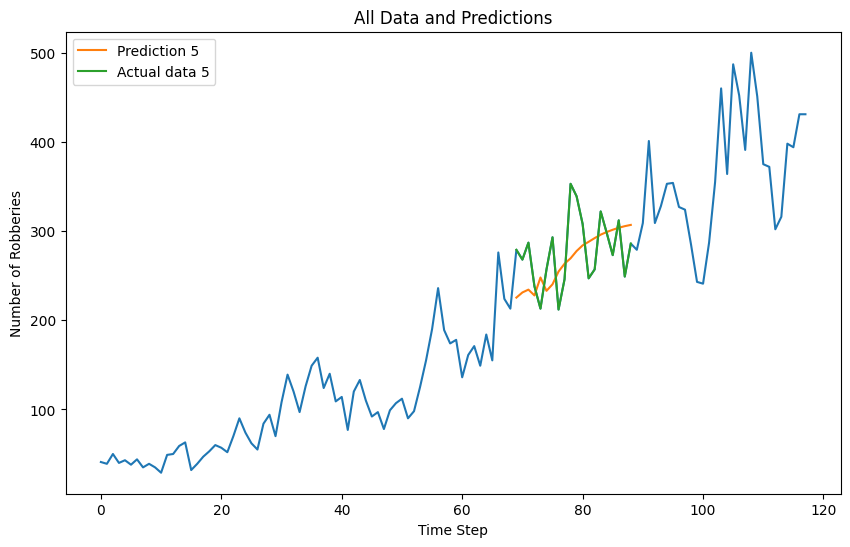

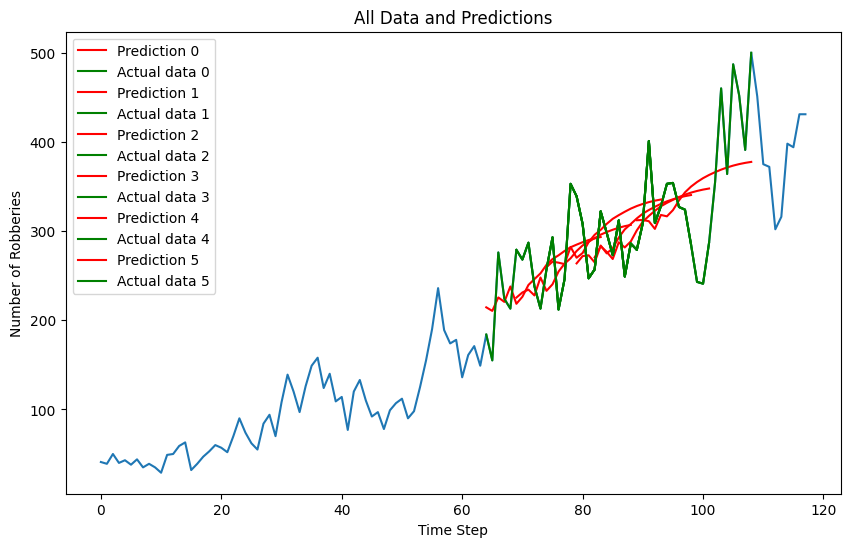

In [6]:
robberies_values = denormalize_data(normalize_data(df['Robberies'].values))
predicted_values = []



for i, p in enumerate(predictions):
    index = val_indices[i] + n_past
    x_values = [j for j in range(index,index+n_future)]
    plt.figure(figsize=(10, 6))
    plt.plot(robberies_values)
    plt.plot(x_values,p, label=f"Prediction {i}")
    plt.plot(x_values,denormalize_data(y_val[i].flatten()), label=f"Actual data {i}")
    plt.xlabel('Time Step')
    plt.ylabel('Number of Robberies')
    plt.title('All Data and Predictions')
    plt.legend()
    plt.show()


plt.figure(figsize=(10, 6))
plt.plot(robberies_values)

for i, p in enumerate(predictions):
    index = val_indices[i] + n_past
    x_values = [j for j in range(index,index+n_future)]
    plt.plot(x_values,p, label=f"Prediction {i}", color="red")
    plt.plot(x_values,denormalize_data(y_val[i].flatten()), label=f"Actual data {i}", color="green")

plt.xlabel('Time Step')
plt.ylabel('Number of Robberies')
plt.title('All Data and Predictions')
plt.legend()
plt.show()